In [3]:
# Load selected columns and engineer features for road, weather, and time-of-day analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cols = ['ID','Start_Time','Severity','Start_Lat','Start_Lng','Weather_Condition',
        'Temperature(F)','Humidity(%)','Visibility(mi)','Precipitation(in)','Wind_Speed(mph)',
        'Sunrise_Sunset','Civil_Twilight','Amenity','Bump','Crossing','Junction','No_Exit',
        'Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

acc = pd.read_csv("C:/Users/hp/Desktop/US_Accidents_March23.csv", usecols=cols, low_memory=True)
acc['Start_Time'] = pd.to_datetime(acc['Start_Time'], errors='coerce')
acc['hour'] = acc['Start_Time'].dt.hour

wc = acc['Weather_Condition'].fillna('').str.lower()
acc['weather_simple'] = np.select([
    wc.str.contains('snow|sleet|blizzard|wintry'),
    wc.str.contains('rain|drizzle|shower'),
    wc.str.contains('thunder|tstorm'),
    wc.str.contains('fog|mist|haze|smoke'),
    wc.str.contains('clear'),
    wc.str.contains('cloud'),
], ['Snow','Rain','Thunderstorm','Fog/Mist','Clear','Cloudy'], default='Other')

acc['precip'] = pd.to_numeric(acc['Precipitation(in)'], errors='coerce')
acc['wet'] = (acc['precip'] > 0) | wc.str.contains('rain|snow|drizzle|sleet')

ct = acc['Civil_Twilight'].fillna(acc['Sunrise_Sunset']).str.lower()
acc['is_night'] = ct.isin(['night'])

acc = acc.dropna(subset=['Start_Lat','Start_Lng','hour','Severity'])
print(acc.head())

    ID  Severity          Start_Time  Start_Lat  Start_Lng  Temperature(F)  \
0  A-1         3 2016-02-08 05:46:00  39.865147 -84.058723            36.9   
1  A-2         2 2016-02-08 06:07:59  39.928059 -82.831184            37.9   
2  A-3         2 2016-02-08 06:49:27  39.063148 -84.032608            36.0   
3  A-4         3 2016-02-08 07:23:34  39.747753 -84.205582            35.1   
4  A-5         2 2016-02-08 07:39:07  39.627781 -84.188354            36.0   

   Humidity(%)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         91.0            10.0              NaN               0.02  ...   
1        100.0            10.0              NaN               0.00  ...   
2        100.0            10.0              3.5                NaN  ...   
3         96.0             9.0              4.6                NaN  ...   
4         89.0             6.0              3.5                NaN  ...   

    Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Civil_Twilight  \
0  

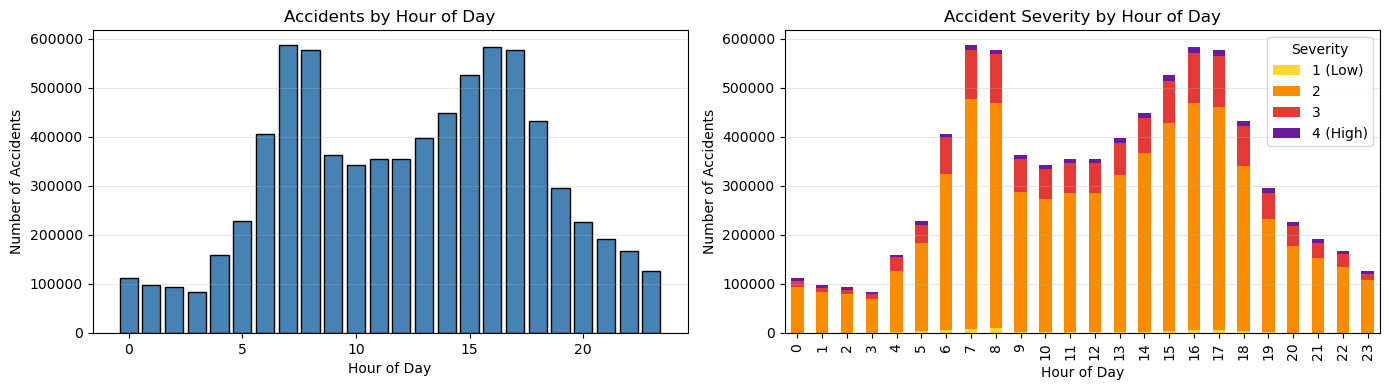

Time of day analysis complete


In [4]:
# Analyze patterns by time of day
hour_dist = acc.groupby('hour').size()
hour_sev = acc.groupby(['hour','Severity']).size().unstack(fill_value=0)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

axes[0].bar(hour_dist.index, hour_dist.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Accidents by Hour of Day')
axes[0].grid(axis='y', alpha=0.3)

hour_sev.plot(kind='bar', stacked=True, ax=axes[1], color=['#fdd835','#fb8c00','#e53935','#6a1b9a'])
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Number of Accidents')
axes[1].set_title('Accident Severity by Hour of Day')
axes[1].legend(title='Severity', labels=['1 (Low)','2','3','4 (High)'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print('Time of day analysis complete')

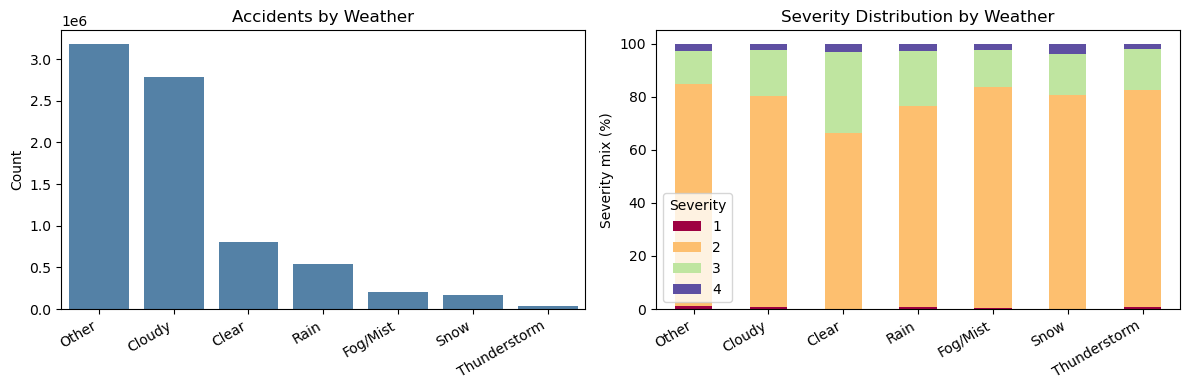

Weather analysis complete


In [4]:
# Weather patterns: counts and severity mix by simplified weather category
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

acc['sev_high'] = acc['Severity'] >= 3
weather_counts = acc['weather_simple'].value_counts().head(8)
weather_sev = acc.groupby(['weather_simple','Severity']).size().unstack(fill_value=0).loc[weather_counts.index]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=weather_counts.index, y=weather_counts.values, color='steelblue')
plt.xticks(rotation=30, ha='right')
plt.title('Accidents by Weather')
plt.ylabel('Count')

plt.subplot(1,2,2)
(weather_sev.div(weather_sev.sum(axis=1), axis=0)*100).plot(kind='bar', stacked=True, ax=plt.gca(), colormap='Spectral')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Severity mix (%)')
plt.title('Severity Distribution by Weather')
plt.tight_layout()
plt.show()

print('Weather analysis complete')

In [8]:
# Load selected columns and engineer features for road, weather, and time-of-day analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

cols = ['ID','Start_Time','Severity','Start_Lat','Start_Lng','Weather_Condition',
        'Temperature(F)','Humidity(%)','Visibility(mi)','Precipitation(in)','Wind_Speed(mph)',
        'Sunrise_Sunset','Civil_Twilight','Amenity','Bump','Crossing','Junction','No_Exit',
        'Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

acc = pd.read_csv('C:/Users/hp/Desktop/US_Accidents_March23.csv', usecols=cols, low_memory=True)
acc['Start_Time'] = pd.to_datetime(acc['Start_Time'], errors='coerce')
acc['hour'] = acc['Start_Time'].dt.hour

wc = acc['Weather_Condition'].fillna('').str.lower()
acc['weather_simple'] = np.select([
    wc.str.contains('snow|sleet|blizzard|wintry'),
    wc.str.contains('rain|drizzle|shower'),
    wc.str.contains('thunder|tstorm'),
    wc.str.contains('fog|mist|haze|smoke'),
    wc.str.contains('clear'),
    wc.str.contains('cloud'),
], ['Snow','Rain','Thunderstorm','Fog/Mist','Clear','Cloudy'], default='Other')

acc['precip'] = pd.to_numeric(acc['Precipitation(in)'], errors='coerce')
acc['wet'] = (acc['precip'] > 0) | wc.str.contains('rain|snow|drizzle|sleet')

ct = acc['Civil_Twilight'].fillna(acc['Sunrise_Sunset']).str.lower()
acc['is_night'] = ct.isin(['night'])

acc = acc.dropna(subset=['Start_Lat','Start_Lng','hour','Severity'])
print(acc.head())

    ID  Severity          Start_Time  Start_Lat  Start_Lng  Temperature(F)  \
0  A-1         3 2016-02-08 05:46:00  39.865147 -84.058723            36.9   
1  A-2         2 2016-02-08 06:07:59  39.928059 -82.831184            37.9   
2  A-3         2 2016-02-08 06:49:27  39.063148 -84.032608            36.0   
3  A-4         3 2016-02-08 07:23:34  39.747753 -84.205582            35.1   
4  A-5         2 2016-02-08 07:39:07  39.627781 -84.188354            36.0   

   Humidity(%)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  ...  \
0         91.0            10.0              NaN               0.02  ...   
1        100.0            10.0              NaN               0.00  ...   
2        100.0            10.0              3.5                NaN  ...   
3         96.0             9.0              4.6                NaN  ...   
4         89.0             6.0              3.5                NaN  ...   

    Stop  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Civil_Twilight  \
0  

In [11]:
# Analyze road features and their association with accident severity
# Road features: Amenity, Bump, Crossing, Junction, No_Exit, Railway, Roundabout, Station, Stop, Traffic_Calming, Traffic_Signal

road_features = ['Amenity','Bump','Crossing','Junction','No_Exit','Railway',
                 'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

# Calculate presence rates and severity for each road feature
feature_stats = []
for feat in road_features:
    present = acc[acc[feat] == True]
    absent = acc[acc[feat] == False]
    
    if len(present) > 0:
        feature_stats.append({
            'Feature': feat,
            'Count': len(present),
            'Pct_of_Total': 100 * len(present) / len(acc),
            'Avg_Severity': present['Severity'].mean(),
            'Pct_High_Severity': 100 * (present['Severity'] >= 3).sum() / len(present),
            'Baseline_Severity': absent['Severity'].mean() if len(absent) > 0 else 0
        })

feature_df = pd.DataFrame(feature_stats).sort_values('Avg_Severity', ascending=False)
feature_df['Severity_Lift'] = feature_df['Avg_Severity'] - feature_df['Baseline_Severity']

print(feature_df)

            Feature    Count  Pct_of_Total  Avg_Severity  Pct_High_Severity  \
3          Junction   571342      7.392765      2.298471          26.792359   
5           Railway    66979      0.866661      2.158662          15.130115   
9   Traffic_Calming     7598      0.098313      2.126875          12.516452   
4           No_Exit    19545      0.252899      2.112151          11.276541   
1              Bump     3514      0.045469      2.094479           9.561753   
10   Traffic_Signal  1143772     14.799608      2.089675           9.508801   
8              Stop   214371      2.773810      2.076419           6.221924   
7           Station   201901      2.612457      2.075364           7.506649   
0           Amenity    96334      1.246494      2.069726           6.293728   
6        Roundabout      249      0.003222      2.068273           4.417671   
2          Crossing   873763     11.305881      2.064467           7.041498   

    Baseline_Severity  Severity_Lift  
3           

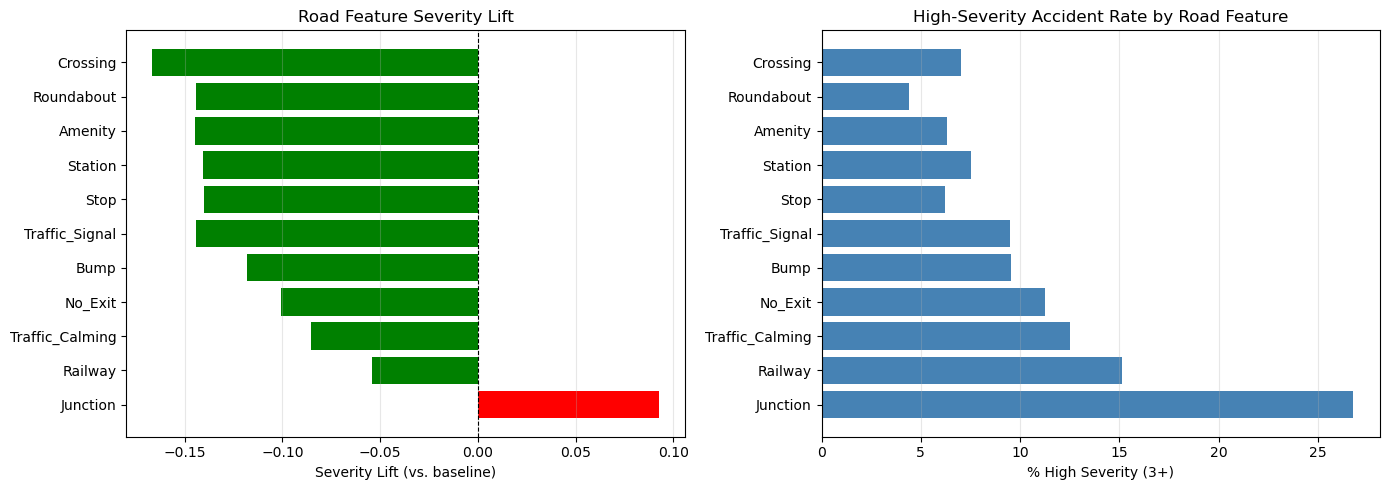

Road feature risk analysis complete


In [12]:
# Visualize road feature risk: severity lift and high-severity percentage
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Severity lift (difference from baseline)
axes[0].barh(feature_df['Feature'], feature_df['Severity_Lift'], 
             color=['red' if x > 0 else 'green' for x in feature_df['Severity_Lift']])
axes[0].axvline(0, color='black', linewidth=0.8, linestyle='--')
axes[0].set_xlabel('Severity Lift (vs. baseline)')
axes[0].set_title('Road Feature Severity Lift')
axes[0].grid(axis='x', alpha=0.3)

# Right: Percentage of high-severity (3+) accidents
axes[1].barh(feature_df['Feature'], feature_df['Pct_High_Severity'], color='steelblue')
axes[1].set_xlabel('% High Severity (3+)')
axes[1].set_title('High-Severity Accident Rate by Road Feature')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print('Road feature risk analysis complete')

In [13]:
# Analyze interaction between hour of day and high-risk road features
# Focus on Junction (highest risk) and compare with Traffic_Signal and Crossing (high volume)

features_to_analyze = ['Junction', 'Traffic_Signal', 'Crossing', 'Stop']

# Calculate hourly patterns for each feature
hourly_feature_data = []

for feat in features_to_analyze:
    for hour in range(24):
        hour_data = acc[acc['hour'] == hour]
        with_feature = hour_data[hour_data[feat] == True]
        
        if len(with_feature) > 0:
            hourly_feature_data.append({
                'Feature': feat,
                'Hour': hour,
                'Count': len(with_feature),
                'Avg_Severity': with_feature['Severity'].mean(),
                'Pct_High_Severity': 100 * (with_feature['Severity'] >= 3).sum() / len(with_feature),
                'Pct_of_Hour': 100 * len(with_feature) / len(hour_data) if len(hour_data) > 0 else 0
            })

hourly_df = pd.DataFrame(hourly_feature_data)
print(hourly_df.head(20))
print('Hourly feature interaction data prepared')

     Feature  Hour  Count  Avg_Severity  Pct_High_Severity  Pct_of_Hour
0   Junction     0  10768      2.304792          23.059064     9.581947
1   Junction     1   9285      2.252773          18.998384     9.565164
2   Junction     2   9014      2.287996          22.198802     9.668873
3   Junction     3   8390      2.320143          24.266985    10.004412
4   Junction     4  11421      2.383767          31.949917     7.144734
5   Junction     5  18047      2.327700          27.871668     7.909038
6   Junction     6  30850      2.302075          27.367909     7.601574
7   Junction     7  39865      2.296726          27.502822     6.785855
8   Junction     8  38432      2.306359          28.702644     6.654016
9   Junction     9  27298      2.314199          28.804308     7.519406
10  Junction    10  23824      2.320517          29.189053     6.951731
11  Junction    11  24197      2.316940          28.788693     6.815288
12  Junction    12  25586      2.296764          26.635660     7

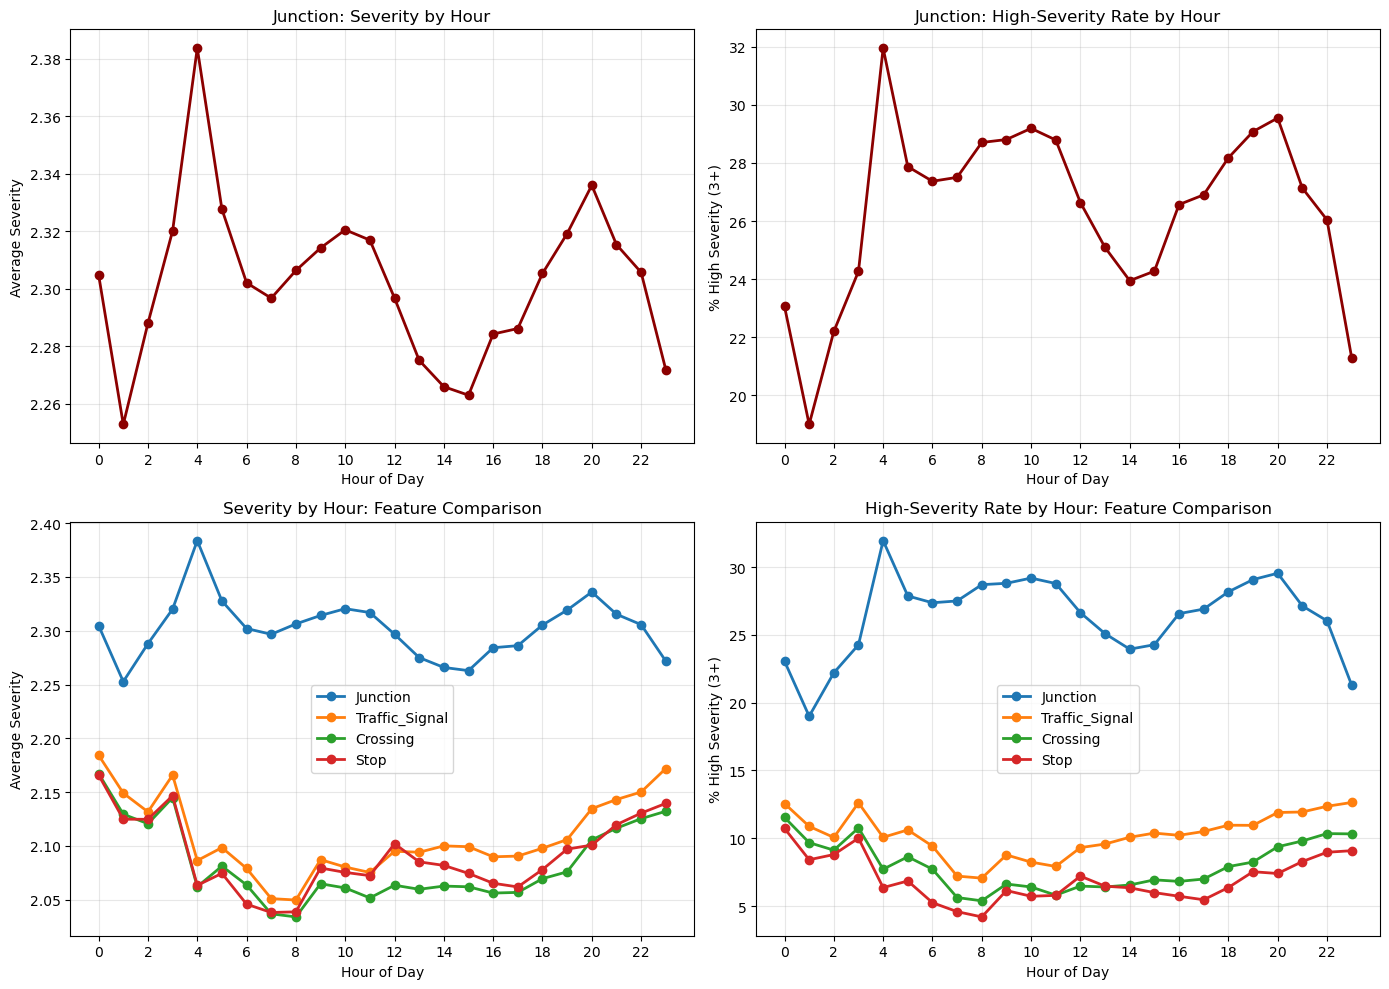

Hour-of-day and road feature interaction analysis complete


In [14]:
# Visualize how hour of day affects high-risk features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top-left: Junction severity by hour
junction_data = hourly_df[hourly_df['Feature'] == 'Junction'].sort_values('Hour')
axes[0,0].plot(junction_data['Hour'], junction_data['Avg_Severity'], marker='o', linewidth=2, color='darkred')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Average Severity')
axes[0,0].set_title('Junction: Severity by Hour')
axes[0,0].grid(alpha=0.3)
axes[0,0].set_xticks(range(0,24,2))

# Top-right: Junction high-severity percentage by hour
axes[0,1].plot(junction_data['Hour'], junction_data['Pct_High_Severity'], marker='o', linewidth=2, color='darkred')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('% High Severity (3+)')
axes[0,1].set_title('Junction: High-Severity Rate by Hour')
axes[0,1].grid(alpha=0.3)
axes[0,1].set_xticks(range(0,24,2))

# Bottom-left: Compare severity across features by hour
for feat in features_to_analyze:
    feat_data = hourly_df[hourly_df['Feature'] == feat].sort_values('Hour')
    axes[1,0].plot(feat_data['Hour'], feat_data['Avg_Severity'], marker='o', label=feat, linewidth=2)
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Average Severity')
axes[1,0].set_title('Severity by Hour: Feature Comparison')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)
axes[1,0].set_xticks(range(0,24,2))

# Bottom-right: Compare high-severity percentage across features by hour
for feat in features_to_analyze:
    feat_data = hourly_df[hourly_df['Feature'] == feat].sort_values('Hour')
    axes[1,1].plot(feat_data['Hour'], feat_data['Pct_High_Severity'], marker='o', label=feat, linewidth=2)
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('% High Severity (3+)')
axes[1,1].set_title('High-Severity Rate by Hour: Feature Comparison')
axes[1,1].legend()
axes[1,1].grid(alpha=0.3)
axes[1,1].set_xticks(range(0,24,2))

plt.tight_layout()
plt.show()

print('Hour-of-day and road feature interaction analysis complete')